# Creating coordinates labels as masks for UNet

In [1]:
from wings.visualizing.visualize import visualize_coords, plt_imshow
from wings.visualizing.image_preprocess import denormalize
import numpy as np
from wings.config import PROCESSED_DATA_DIR

from wings.dataset import load_datasets

train_val_test_datasets = load_datasets(
    [PROCESSED_DATA_DIR / 'train_dataset.pth',
     PROCESSED_DATA_DIR / 'val_dataset.pth',
     PROCESSED_DATA_DIR / 'test_dataset.pth']
)
_, _, test_dataset = train_val_test_datasets

2025-04-07 16:30:52.686 | INFO     | wings.config:<module>:40 - PROJ_ROOT path is: /home/mkrajew/bees
2025-04-07 16:30:52.794 | INFO     | wings.config:<module>:61 - torch.cuda.get_device_name()='NVIDIA RTX A3000 12GB Laptop GPU'


In [2]:
max_n = len(test_dataset)
n = np.random.randint(0, max_n)
image, labels = test_dataset[n]
x_coords, y_coords = labels[::2].int(), labels[1::2].int()
y_coords = 224 - y_coords - 1
image = denormalize(image)

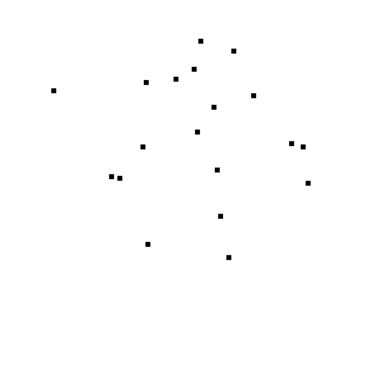

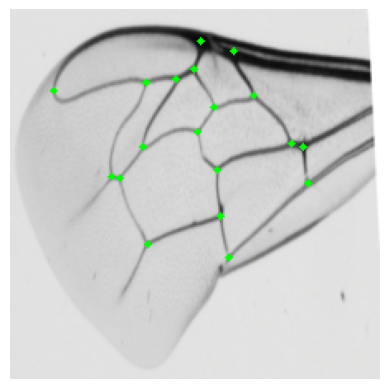

In [3]:
import numpy as np
from wings.visualizing.visualize import plt_imshow

image_size = (224, 224)
square_size = 3

# Create a black image (grayscale)
# mask = np.zeros(image_size, dtype=np.uint8)
mask = np.full(image_size, 255, dtype=np.uint8)

half = square_size // 2
for x, y in zip(x_coords, y_coords):
    # Calculate square bounds and clip them to image size
    x1 = max(0, x - half)
    y1 = max(0, y - half)
    x2 = min(image_size[1] - 1, x + half)
    y2 = min(image_size[0] - 1, y + half)

    # mask[y1:y2+1, x1:x2+1] = 255
    mask[y1:y2+1, x1:x2+1] = 0

plt_imshow(mask)
visualize_coords(image, labels.squeeze(0), spot_size=2)
